In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

### Neural Network with three hidden layers

In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 5
        hiddenLayer1Neurons = 32
        hiddenLayer2Neurons = 64
        hiddenLayer3Neurons = 32
        hiddenLayer4Neurons = 20
        outputLayerNeurons = 4

        self.W_IH1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H12 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H23 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_H34 = np.random.randn(hiddenLayer3Neurons, hiddenLayer4Neurons)
        self.W_H4O = np.random.randn(hiddenLayer4Neurons, outputLayerNeurons)
        self.learning_rate = 0.05

    def sigmoid(self, x, der=False):
        if der == True:
          return x * (1 - x)
        else:
          return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_IH1)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H12)
        self.hidden2_output = self.sigmoid(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H23)
        self.hidden3_output = self.sigmoid(hidden3_input)

        hidden4_input = np.dot(self.hidden3_output, self.W_H34)
        self.hidden4_output = self.sigmoid(hidden4_input)

        output_input = np.dot(self.hidden4_output, self.W_H4O)
        pred = self.sigmoid(output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = output_error * self.learning_rate * self.sigmoid(pred, True)

        hidden4_error = output_delta.dot(self.W_H4O.T)
        hidden4_delta = hidden4_error * self.learning_rate * self.sigmoid(self.hidden4_output, True)

        hidden3_error = hidden4_delta.dot(self.W_H34.T)
        hidden3_delta = hidden3_error * self.learning_rate * self.sigmoid(self.hidden3_output, True)

        hidden2_error = hidden3_delta.dot(self.W_H23.T)
        hidden2_delta = hidden2_error * self.learning_rate * self.sigmoid(self.hidden2_output, True)

        hidden1_error = hidden2_delta.dot(self.W_H12.T)
        hidden1_delta = hidden1_error * self.learning_rate * self.sigmoid(self.hidden1_output, True)

        self.W_H4O += self.hidden4_output.T.dot(output_delta)
        self.W_H34 += self.hidden3_output.T.dot(hidden4_delta)
        self.W_H23 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H12 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_IH1 += X.T.dot(hidden1_delta)


    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def get_output(self, X):
        return self.feedForward(X)

In [ ]:
try:
    df = pd.read_csv('FanSpeedDS.csv')
    X = df[['temp', 'cpu', 'memory', 'disk', 'network']].values  # Extract features
    Y = df[['fanspeed']].values  # Extract target variable

except FileNotFoundError:
    print("Error: 'data.csv' not found. Please upload the CSV file.")
    exit()  # Exit if the file is not found

In [ ]:
X

array([[88,  8, 81, 40, 38],
       [54, 15, 63, 87, 30],
       [73, 89, 10, 60, 49],
       ...,
       [77, 51, 22, 71, 72],
       [76, 50, 42, 44, 33],
       [68,  3, 28, 59, 55]])

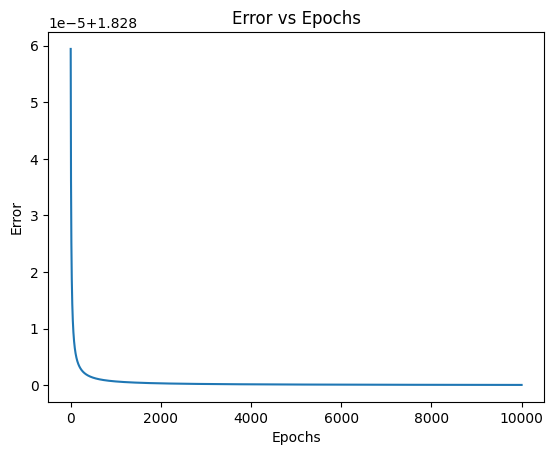

In [ ]:
NN = NeuralNetwork()

err = []
for i in range(10000):
  NN.train(X, Y)
  err.append(np.mean(np.abs(Y - NN.feedForward(X))))
plt.plot(err)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs")
plt.show()